In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

from sklearn.preprocessing import 

In [4]:
data = pd.read_excel('project_3_train+test.xlsx', index_col='Unnamed: 0')

In [15]:
train = data.iloc[:357]
test = data.iloc[357:]

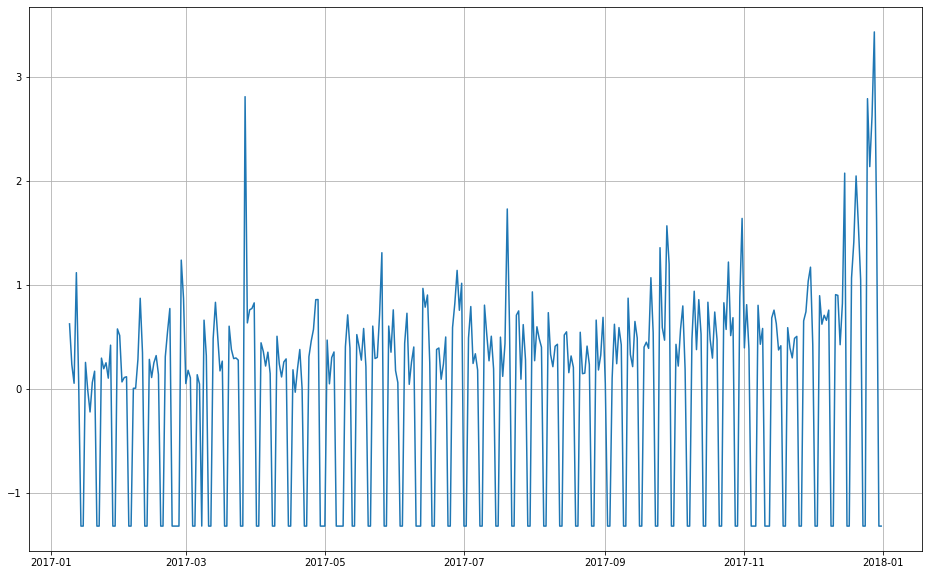

In [29]:
plt.figure(figsize=(16,10))
plt.plot(train)
plt.grid()
plt.show()

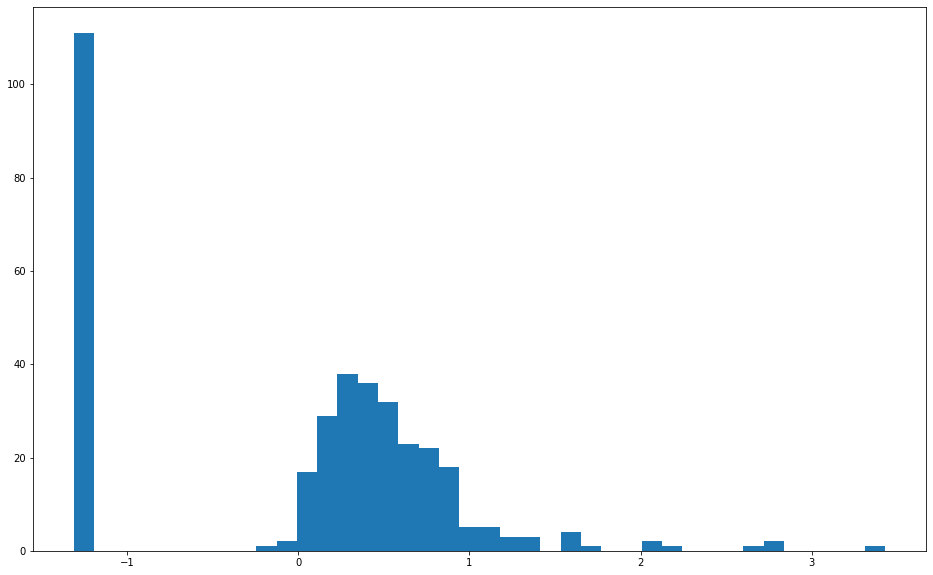

In [28]:
plt.figure(figsize=(16,10))
plt.hist(train.values, bins=40)
plt.show()

Столбец слева и сильнейшие коллебания в отрицательные значения говорят о том, что что-то не так.

Если заглянуть в файл и календарь, то можно увидеть, что это одно и то же значение и оно стоит на выходном дне.

__Этот вопросик надо обкашлять, потому что простым удалением тут не обойтись__

# Бизнес-логика

# Anomaly detection

# Feature selection